# Stock Prediction Using LSTM Time series Analysis


<h1><b>Introduction</b></h1>
<i>As per the problem statement to predict the return of stocks on 30th trading day, we have used a Long Short Term Memory(LSTM) network using Time Series analysis to iteratively predict the closing price of stock on 30th trading day. The LSTM network has been implememted using Keras Library on top of Tensorflow.Previous 29 days stock prices are fed as an input to the LSTM network and it predicts the closing price of the stock on 30th trading day.<i>

<b><i>Dependencies: Numpy,Pandas,Matplotlib for data analysis cleaning and plotting<i><b>

In [1]:
import numpy
from numpy import newaxis
import matplotlib.pyplot as plt
import pandas as pd  
import math as m
from pandas import read_csv


<b><i>The math library is used in the function created to calculate various technical indicators</i></b>

In [2]:
import math

<b><i>Keras is used with Tensorflow as backend for prediction using LSTM Time-series analysis. Sklearn library is used forparameter normalization and calculation of mean squared error</i></b> 


In [3]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings("ignore")

c:\users\anirudh prakash\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<b><i>Function for Creating the Test data (Previous 29 days Values as Input dataset)</i></b>

In [4]:
def create_dataset_test(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back)+1, 0]
        dataX.append(a)
    for i in range(len(dataset)-look_back-1):
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)



<b><i>Function for Creating the Traning data (Previous 29 days Values as Input dataset and 30th day value as output dataset)</i></b>

In [5]:
def create_dataset_train(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back)+1, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

<b><i>Fixed ramdom seed for reproducibility. Read the dataset using Pandas 'read_csv' function.</i></b>

In [26]:
numpy.random.seed(7)
dataframe = read_csv('YESBANK.NS.csv', sep=",")
dataframe.dropna(inplace=True)
dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-04-04,86.500000,87.370003,85.000000,85.370003,64.636253,10367295.0
1,2013-04-05,85.400002,86.900002,84.639999,85.129997,64.454536,9522365.0
2,2013-04-08,85.400002,86.089996,84.709999,85.070000,64.409119,5022015.0
3,2013-04-09,85.800003,87.360001,84.709999,84.910004,64.287979,9051245.0
4,2013-04-10,85.400002,85.980003,83.349998,85.690002,64.878532,11236575.0


<h2>Technical Indicators</h2>

<b><i>Simple Moving Average :30 days</i></b>

In [32]:

def MA(df, n):  
    MA = pd.Series(pd.rolling_mean(df['Close'], n), name = 'SMA_' + str(n))  
    df = df.join(MA)  
    return df

dataframe1=MA(dataframe,30)


            Date        Open        High         Low       Close   Adj Close  \
1227  2018-03-27  307.000000  309.250000  300.700012  303.500000  303.500000   
1228  2018-03-28  300.149994  307.500000  299.100006  304.850006  304.850006   
1229  2018-04-02  304.850006  308.500000  303.600006  306.250000  306.250000   
1230  2018-04-03  306.450012  314.200012  304.000000  313.100006  313.100006   
1231  2018-04-04  313.000000  320.000000  304.000000  305.450012  305.450012   

          Volume      SMA_30  
1227  15267419.0  312.424998  
1228  14952643.0  311.406665  
1229   8844027.0  310.936665  
1230  10392997.0  310.713332  
1231  13516525.0  310.501666  


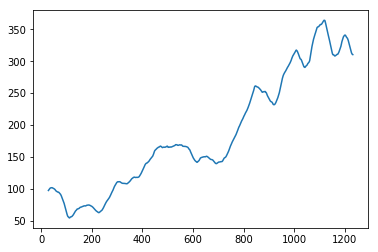

In [33]:
print(dataframe1.tail())
y=dataframe1['SMA_30']
plt.plot(y)
plt.show()

<b><i>Exponential Moving Agerage: 30 days</i></b>

            Date        Open        High         Low       Close   Adj Close  \
1227  2018-03-27  307.000000  309.250000  300.700012  303.500000  303.500000   
1228  2018-03-28  300.149994  307.500000  299.100006  304.850006  304.850006   
1229  2018-04-02  304.850006  308.500000  303.600006  306.250000  306.250000   
1230  2018-04-03  306.450012  314.200012  304.000000  313.100006  313.100006   
1231  2018-04-04  313.000000  320.000000  304.000000  305.450012  305.450012   

          Volume      EMA_30  
1227  15267419.0  312.552931  
1228  14952643.0  312.055968  
1229   8844027.0  311.681390  
1230  10392997.0  311.772913  
1231  13516525.0  311.364984  


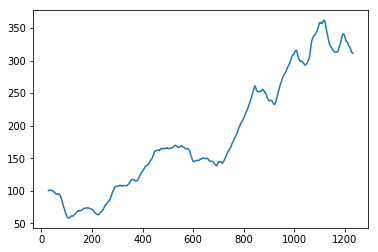

In [9]:
 def EMA(df, n):  
    EMA = pd.Series(pd.ewma(df['Close'], span = n, min_periods = n - 1), name = 'EMA_' + str(n))  
    df = df.join(EMA)  
    return df
dataframe1=EMA(dataframe,30)
print(dataframe1.tail())
y=dataframe1['EMA_30']
plt.plot(y)
plt.show()

<b><i>Stochastic Oscillator %K</i></b>

            Date        Open        High         Low       Close   Adj Close  \
1227  2018-03-27  307.000000  309.250000  300.700012  303.500000  303.500000   
1228  2018-03-28  300.149994  307.500000  299.100006  304.850006  304.850006   
1229  2018-04-02  304.850006  308.500000  303.600006  306.250000  306.250000   
1230  2018-04-03  306.450012  314.200012  304.000000  313.100006  313.100006   
1231  2018-04-04  313.000000  320.000000  304.000000  305.450012  305.450012   

          Volume      EMA_30      SO%k  
1227  15267419.0  312.552931  0.327484  
1228  14952643.0  312.055968  0.684524  
1229   8844027.0  311.681390  0.540816  
1230  10392997.0  311.772913  0.892156  
1231  13516525.0  311.364984  0.090626  


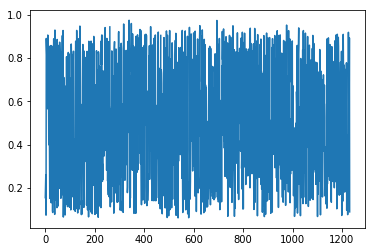

In [10]:
def STOK(df):  
    SOk = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name = 'SO%k')  
    df = df.join(SOk)  
    return df

dataframe1=STOK(dataframe1)
print(dataframe1.tail())
y=dataframe1['SO%k']
plt.plot(y)
plt.show()

<b><i>Average Directional Moving Index</i></b>

            Date        Open        High         Low       Close   Adj Close  \
1227  2018-03-27  307.000000  309.250000  300.700012  303.500000  303.500000   
1228  2018-03-28  300.149994  307.500000  299.100006  304.850006  304.850006   
1229  2018-04-02  304.850006  308.500000  303.600006  306.250000  306.250000   
1230  2018-04-03  306.450012  314.200012  304.000000  313.100006  313.100006   
1231  2018-04-04  313.000000  320.000000  304.000000  305.450012  305.450012   

          Volume      EMA_30      SO%k  ADX_30_30  
1227  15267419.0  312.552931  0.327484   0.192882  
1228  14952643.0  312.055968  0.684524   0.186569  
1229   8844027.0  311.681390  0.540816   0.174891  
1230  10392997.0  311.772913  0.892156   0.168545  
1231  13516525.0  311.364984  0.090626   0.168545  


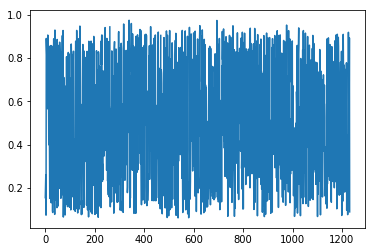

In [11]:
def ADX(df, n, n_ADX):  
    i = 0  
    UpI = []  
    DoI = []  
    while i + 1 <= df.index[-1]:  
        UpMove = df.get_value(i + 1, 'High') - df.get_value(i, 'High')  
        DoMove = df.get_value(i, 'Low') - df.get_value(i + 1, 'Low')  
        if UpMove > DoMove and UpMove > 0:  
            UpD = UpMove  
        else: UpD = 0  
        UpI.append(UpD)  
        if DoMove > UpMove and DoMove > 0:  
            DoD = DoMove  
        else: DoD = 0  
        DoI.append(DoD)  
        i = i + 1  
    i = 0  
    TR_l = [0]  
    while i < df.index[-1]:  
        TR = max(df.get_value(i + 1, 'High'), df.get_value(i, 'Close')) - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))  
        TR_l.append(TR)  
        i = i + 1  
    TR_s = pd.Series(TR_l)  
    ATR = pd.Series(pd.ewma(TR_s, span = n, min_periods = n))  
    UpI = pd.Series(UpI)  
    DoI = pd.Series(DoI)  
    PosDI = pd.Series(pd.ewma(UpI, span = n, min_periods = n - 1) / ATR)  
    NegDI = pd.Series(pd.ewma(DoI, span = n, min_periods = n - 1) / ATR)  
    ADX = pd.Series(pd.ewma(abs(PosDI - NegDI) / (PosDI + NegDI), span = n_ADX, min_periods = n_ADX - 1), name = 'ADX_' + str(n) + '_' + str(n_ADX))  
    df = df.join(ADX)  
    return df


dataframe1=ADX(dataframe1,30,30)
print(dataframe1.tail())

plt.plot(y)
plt.show()


<b><i>Relative Strength Index</i></b>

In [12]:
def RSI(df, n):  
    i = 0  
    UpI = [0]  
    DoI = [0]  
    while i + 1 <= df.index[-1]:  
        UpMove = df.get_value(i + 1, 'High') - df.get_value(i, 'High')  
        DoMove = df.get_value(i, 'Low') - df.get_value(i + 1, 'Low')  
        if UpMove > DoMove and UpMove > 0:  
            UpD = UpMove  
        else: UpD = 0  
        UpI.append(UpD)  
        if DoMove > UpMove and DoMove > 0:  
            DoD = DoMove  
        else: DoD = 0  
        DoI.append(DoD)  
        i = i + 1  
    UpI = pd.Series(UpI)  
    DoI = pd.Series(DoI)  
    PosDI = pd.Series(pd.ewma(UpI, span = n, min_periods = n - 1))  
    NegDI = pd.Series(pd.ewma(DoI, span = n, min_periods = n - 1))  
    RSI = pd.Series(PosDI / (PosDI + NegDI), name = 'RSI_' + str(n))  
    df = df.join(RSI)  
    return df
dataframe1=RSI(dataframe1,30)
dataframe1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,EMA_30,SO%k,ADX_30_30,RSI_30
1227,2018-03-27,307.000000,309.250000,300.700012,303.500000,303.500000,15267419.0,312.552931,0.327484,0.192882,0.454451
1228,2018-03-28,300.149994,307.500000,299.100006,304.850006,304.850006,14952643.0,312.055968,0.684524,0.186569,0.444370
1229,2018-04-02,304.850006,308.500000,303.600006,306.250000,306.250000,8844027.0,311.681390,0.540816,0.174891,0.452484
1230,2018-04-03,306.450012,314.200012,304.000000,313.100006,313.100006,10392997.0,311.772913,0.892156,0.168545,0.497223
1231,2018-04-04,313.000000,320.000000,304.000000,305.450012,305.450012,13516525.0,311.364984,0.090626,0.168545,0.538262


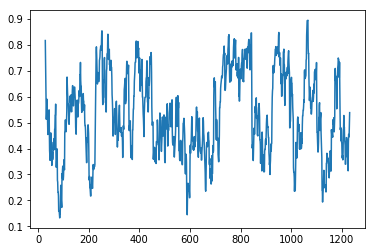

In [13]:
y=dataframe1['RSI_30']
#x=dataframe['Date']
plt.plot(y)
plt.show()

<b><i>Chaikin Oscillator</i></b>

In [14]:
def Chaikin(df):  
    ad = (2 * df['Close'] - df['High'] - df['Low']) / (df['High'] - df['Low']) * df['Volume']  
    Chaikin = pd.Series(pd.ewma(ad, span = 3, min_periods = 2) - pd.ewma(ad, span = 10, min_periods = 9), name = 'Chaikin')  
    df = df.join(Chaikin)  
    return df
dataframe1=Chaikin(dataframe1)
dataframe1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,EMA_30,SO%k,ADX_30_30,RSI_30,Chaikin
1227,2018-03-27,307.000000,309.250000,300.700012,303.500000,303.500000,15267419.0,312.552931,0.327484,0.192882,0.454451,1.630075e+06
1228,2018-03-28,300.149994,307.500000,299.100006,304.850006,304.850006,14952643.0,312.055968,0.684524,0.186569,0.444370,3.108088e+06
1229,2018-04-02,304.850006,308.500000,303.600006,306.250000,306.250000,8844027.0,311.681390,0.540816,0.174891,0.452484,1.904081e+06
1230,2018-04-03,306.450012,314.200012,304.000000,313.100006,313.100006,10392997.0,311.772913,0.892156,0.168545,0.497223,3.602337e+06
1231,2018-04-04,313.000000,320.000000,304.000000,305.450012,305.450012,13516525.0,311.364984,0.090626,0.168545,0.538262,-2.145224e+06


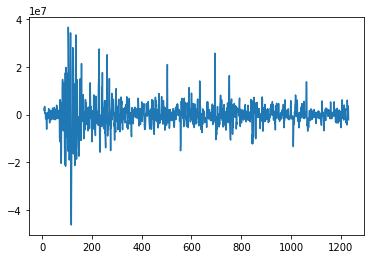

In [15]:
y=dataframe1['Chaikin']
#x=dataframe['Date']
plt.plot(y)
plt.show()

<b><i>Commodity Channel Index</i></b>

In [16]:
def CCI(df, n):  
    PP = (df['High'] + df['Low'] + df['Close']) / 3  
    CCI = pd.Series((PP - pd.rolling_mean(PP, n)) / pd.rolling_std(PP, n), name = 'CCI_' + str(n))  
    df = df.join(CCI)  
    return df
dataframe1=CCI(dataframe1,30)
dataframe1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,EMA_30,SO%k,ADX_30_30,RSI_30,Chaikin,CCI_30
1227,2018-03-27,307.000000,309.250000,300.700012,303.500000,303.500000,15267419.0,312.552931,0.327484,0.192882,0.454451,1.630075e+06,-0.847376
1228,2018-03-28,300.149994,307.500000,299.100006,304.850006,304.850006,14952643.0,312.055968,0.684524,0.186569,0.444370,3.108088e+06,-0.874863
1229,2018-04-02,304.850006,308.500000,303.600006,306.250000,306.250000,8844027.0,311.681390,0.540816,0.174891,0.452484,1.904081e+06,-0.571769
1230,2018-04-03,306.450012,314.200012,304.000000,313.100006,313.100006,10392997.0,311.772913,0.892156,0.168545,0.497223,3.602337e+06,-0.036306
1231,2018-04-04,313.000000,320.000000,304.000000,305.450012,305.450012,13516525.0,311.364984,0.090626,0.168545,0.538262,-2.145224e+06,-0.086966


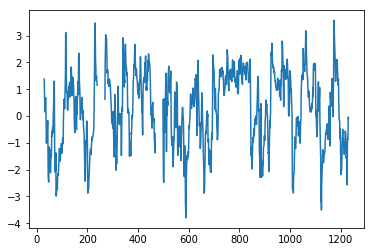

In [17]:
y=dataframe1['CCI_30']
#x=dataframe['Date']
plt.plot(y)
plt.show()

<b><i>Closing Price Graph</i></b>

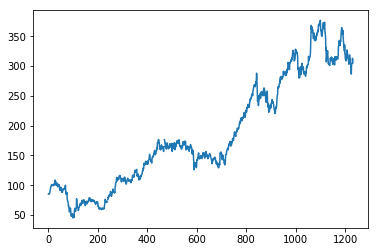

In [18]:
y=dataframe1['Close']
#x=dataframe['Date']
plt.plot(y)
plt.show()

<b><i>Loading the Dataset and Removing the Date, Open , High, Low, Adj Close and Volume</i></b>

In [ ]:
dataframe = read_csv('YESBANK.NS.csv', sep=",")
del dataframe['Date']
del dataframe['High']
del dataframe['Low']
del dataframe['Adj Close']
del dataframe['Open']
del dataframe['Volume']
#Dropping the NA values gives better result than filling it with mean values
dataframe.dropna(inplace=True)
dataset = dataframe.values
dataset = dataset.astype('float32')

<b><i>Dataset Normalization</i></b>

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

<b><i>Splitting the dataset into 90-92% train data and 10% test data (Test data input includes the input for values we need to predict i.e the closing price on 30th trading day)</i></b> 

In [ ]:
train_size = int(len(dataset) * 0.92)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
look_back = 29
trainX, trainY = create_dataset_train(train, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

<b><i>Create and fit the LSTM network with 4 blocks. Batch size=1 and epochs=50</i></b>

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back+1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

<b><i>Predicting the Closing Price iteratiely for next day upto the 30th trading day.</i></b>

In [23]:
for i in range (1,30):
    testX, testY = create_dataset_test(test, look_back)
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    testPredict = model.predict(testX)
    temp=testPredict[len(testPredict)-1,0]
    test=numpy.append(test,[[temp]],axis=0)
    test=numpy.delete(test,0,axis=0)

<b><i>Last Value of testPredict corresponds to the predicted closing price on 30th Trading day i.e 16th May</i></b>

In [24]:
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
print (testPredict)


[[318.16595]
 [317.96973]
 [317.7194 ]
 [317.811  ]
 [315.5267 ]
 [318.47296]
 [320.04233]
 [330.3501 ]
 [334.1876 ]
 [340.90546]
 [342.71854]
 [346.11594]
 [344.34012]
 [341.4072 ]
 [337.91232]
 [342.36942]
 [343.2611 ]
 [347.76688]
 [352.87292]
 [358.77307]
 [361.26917]
 [363.34772]
 [360.00256]
 [357.41483]
 [355.416  ]
 [358.55298]
 [353.23972]
 [348.1562 ]
 [344.56656]
 [340.9679 ]
 [338.33047]
 [333.72858]
 [335.99762]
 [330.52368]
 [325.70123]
 [319.98276]
 [318.91257]
 [316.15903]
 [317.87982]
 [319.97693]
 [326.0195 ]
 [329.84958]
 [332.7196 ]
 [329.6409 ]
 [328.88394]
 [320.25986]
 [319.2601 ]
 [315.32428]
 [315.32532]
 [308.82797]
 [313.56952]
 [315.96262]
 [321.16132]
 [318.38318]
 [319.4055 ]
 [313.1486 ]
 [309.92136]
 [305.16025]
 [305.22147]
 [294.76318]
 [303.01273]
 [306.60666]
 [309.2623 ]
 [309.18707]
 [316.84436]
 [312.21307]
 [314.9523 ]
 [316.09622]
 [320.3682 ]
 [321.31802]
 [325.3944 ]
 [326.2485 ]
 [330.1059 ]
 [331.22052]
 [335.26978]
 [335.65424]
 [338.2137 ]

<b><i>Calculate Return</i></b>

In [25]:
dataset=scaler.inverse_transform(dataset)
close_day0_actual=dataset[len(dataset)-1]
close_day30_predicted=testPredict[len(testPredict)-1]
return_predict=((close_day30_predicted-close_day0_actual)/close_day0_actual)*100
print(return_predict)

[17.521235]
